# Figure 001 (v001)

KRAS mutation rates and expression across tissues and cell types.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import janitor  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import breezy.plotting as bp
from breezy import data as bd
from breezy.breezy_paths import figure_img_file

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
bp.set_breezy_theme(bp.PlottingMode.DISSERTATION)

### Data

In [5]:
kras_mut_freq = bd.cbioportal_kras_freq(cancer_type_inorder=True)
kras_mut_freq.head(3)

,cancer_type,alteration_frequency,alteration_type,alteration_count
0,Pancreatic Cancer,4.347826,multiple,8
1,Pancreatic Cancer,59.239130,mutated,109
2,Colorectal Cancer,0.505051,multiple,3


In [6]:
alterations = kras_mut_freq["alteration_type"].cat.categories
alteration_pal = {k: sns.color_palette("tab10")[i] for i, k in enumerate(alterations)}

## Figure

### Shared

In [7]:
FIGNUM, VERSION = 2, 1
FIGURE_FILE = figure_img_file(FIGNUM, VERSION, "kras-mut-freq")
FIGURE_FILE

PosixPath('/Users/admin/Developer/haigis-lab/breezy/figures/figure_002-v001/fig_002-v001_kras-mut-freq.png')

### a. *KRAS* mutation frequency across cancer

Text(0.5, 0, 'cancer type')

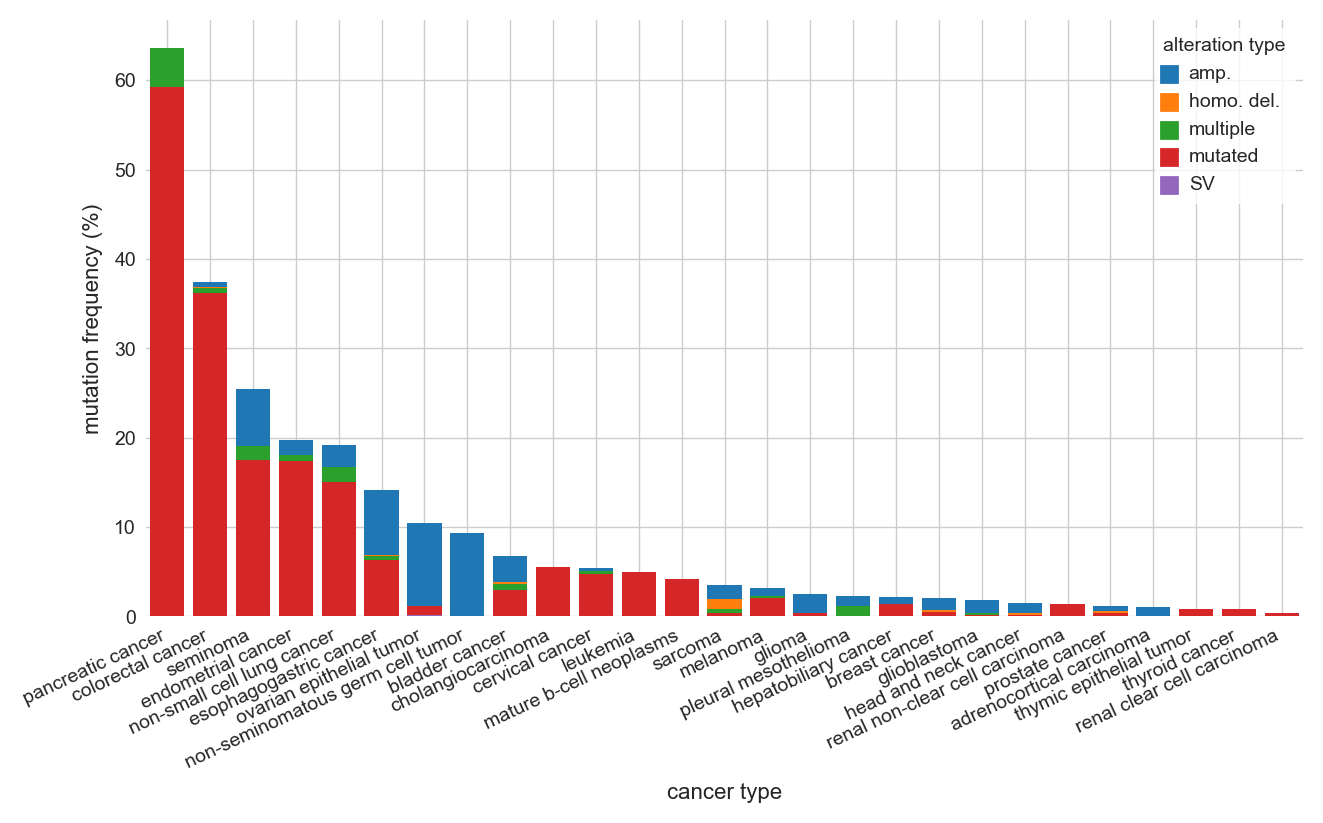

In [8]:
FIGSIZE = (6.5, 4)
figure = plt.figure(constrained_layout=True, figsize=FIGSIZE)
ax = figure.subplots()

sns.histplot(
    kras_mut_freq,
    x="cancer_type",
    hue="alteration_type",
    weights="alteration_frequency",
    multiple="stack",
    shrink=0.8,
    palette=alteration_pal,
    alpha=1,
    lw=0,
    ax=ax,
)
ax.grid(visible=True, axis="x")

xlabels = kras_mut_freq["cancer_type"].cat.categories
xlabels = [x.lower() for x in xlabels]
ax.set_xlim(-0.5, len(xlabels) - 0.5)
ax.set_xticks(ticks=np.arange(len(xlabels)), labels=xlabels, rotation=25, ha="right")


ax.legend(
    handles=bp.pal_to_legend_handles(alteration_pal, marker="s", lw=0),
    title="alteration type",
    loc="upper right",
    handletextpad=1,
    handlelength=0,
    handleheight=0,
    frameon=True,
    edgecolor="w",
)
ax.set_ylabel("mutation frequency (%)")
ax.set_xlabel("cancer type")

## Saving

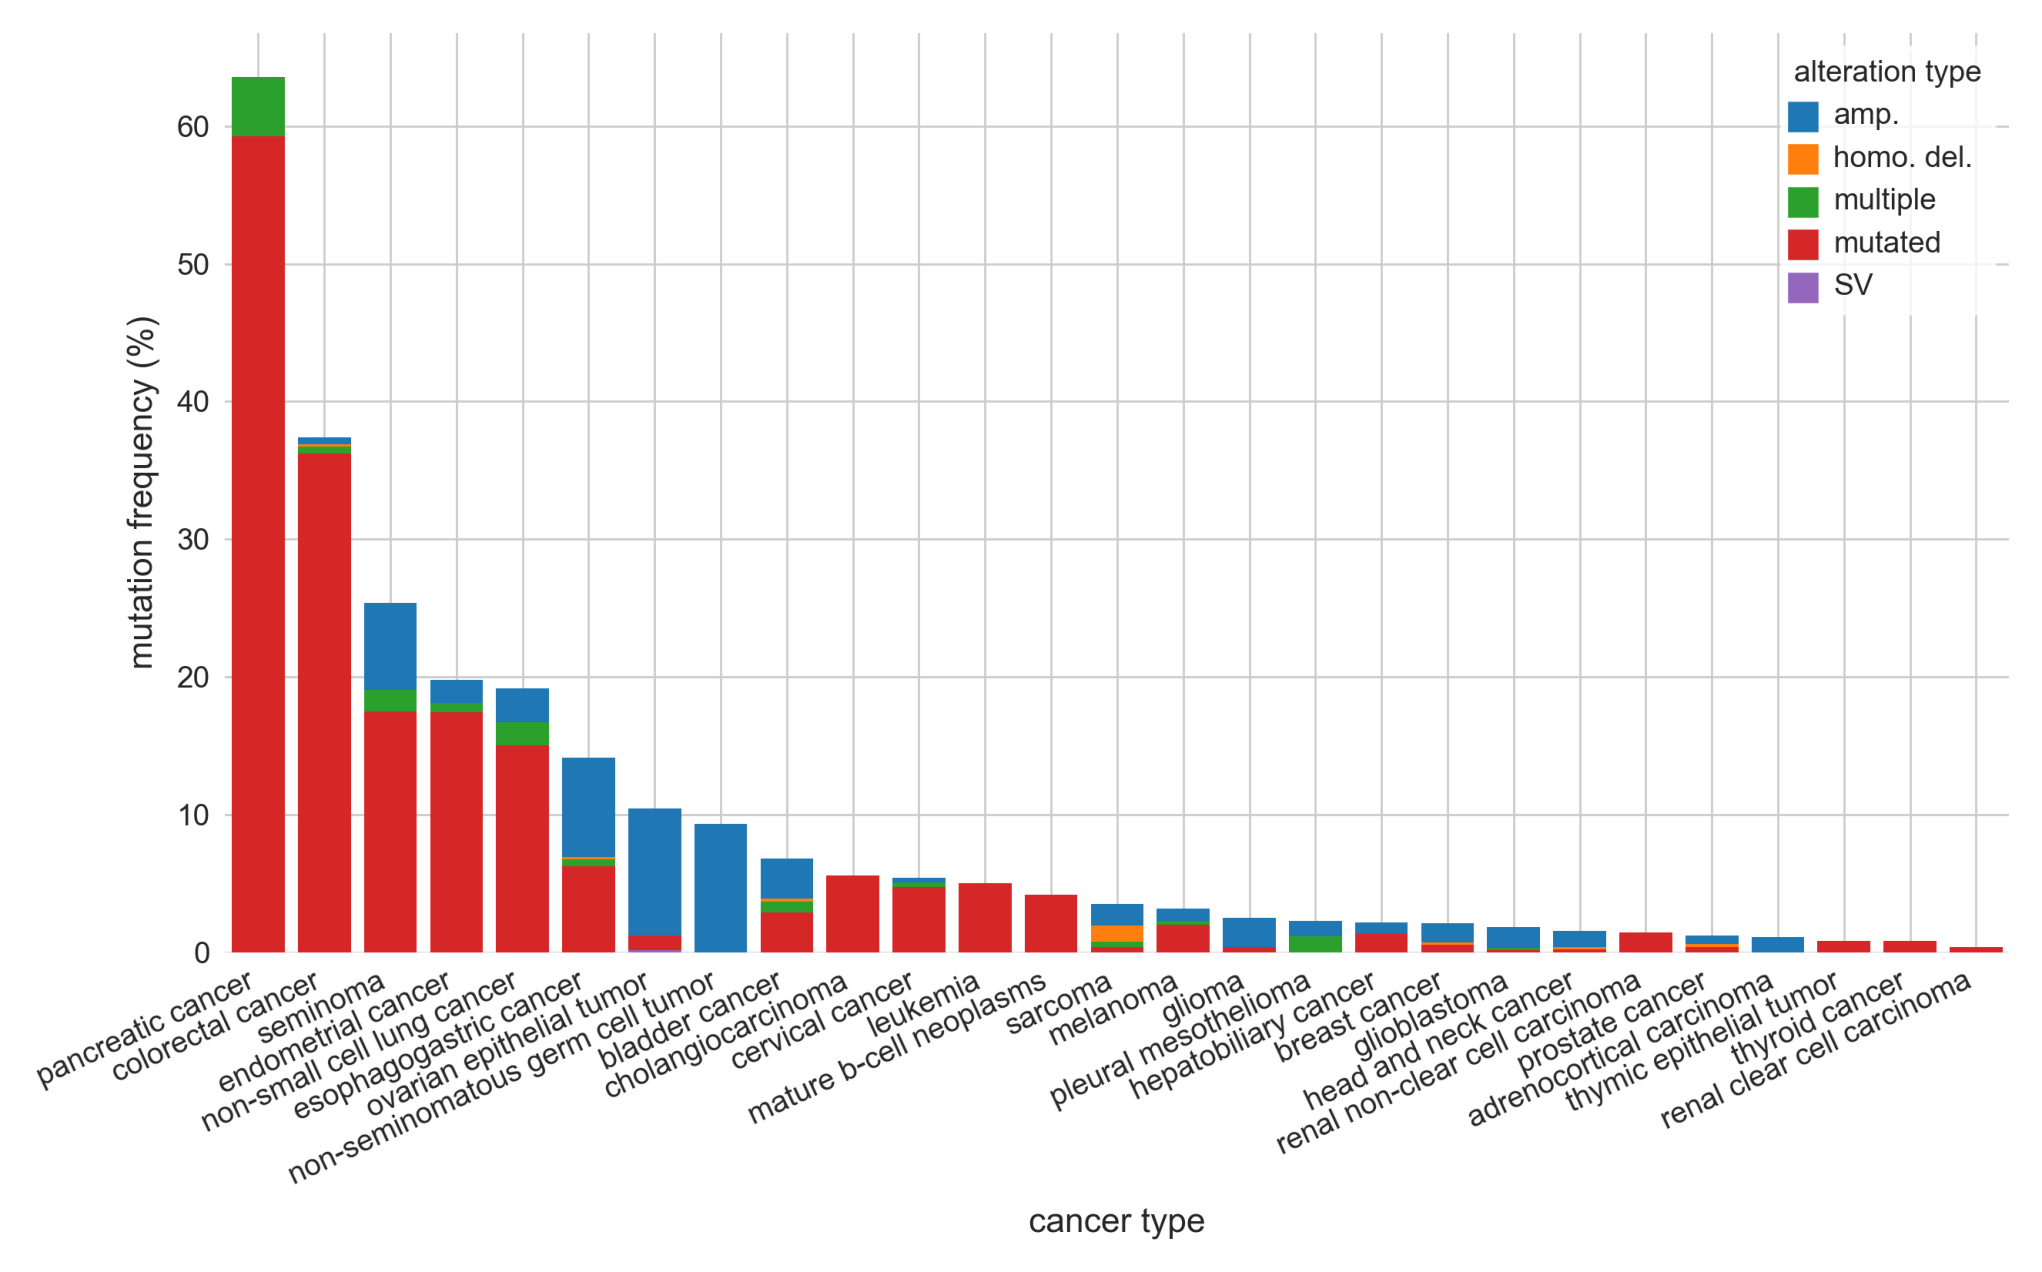

In [9]:
figure.savefig(FIGURE_FILE, dpi=400, pad_inches=0)

fig, ax = plt.subplots(figsize=[x * 2 for x in FIGSIZE])
ax.imshow(plt.imread(FIGURE_FILE))
ax.axis("off")
plt.show()

---

## Session Info

In [10]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-10-17

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.4.0

Compiler    : Clang 13.0.1 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: master

re        : 2.2.1
breezy    : 0.0.1
pandas    : 1.4.4
matplotlib: 3.5.3
numpy     : 1.23.2
janitor   : 0.22.0
seaborn   : 0.11.2

